In [1]:
# Train a multi-layer perceptron on the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import MLPfunctions as mlp
import importlib
from sklearn.model_selection import train_test_split

# Create a dataframe from the csv file
dataset = pd.read_csv('HIGGS_train.csv')
# Make the dataset much smaller
dataset_small = dataset.sample(frac=0.1)
# Set aside a validation set
data_val = dataset_small.sample(frac=0.2)
dataset_small.drop(data_val.index, inplace=True)
X_val = data_val.iloc[:, 1:].values
y_val = data_val.iloc[:, 0].values
# Split the data into features and labels
X = dataset_small.iloc[:, 1:].values
y = dataset_small.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Print all the sizes
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

# Convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train,)
X_test = torch.FloatTensor(X_test)
X_val = torch.FloatTensor(X_val)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(563200, 28)
(140800, 28)
(176000, 28)


Epoch 1/1000, Train Loss: 0.6977357268333435, Test Loss: 0.6953728199005127
Epoch 2/1000, Train Loss: 0.6954204440116882, Test Loss: 0.6938487887382507
Epoch 3/1000, Train Loss: 0.6938450336456299, Test Loss: 0.6929004192352295
Epoch 4/1000, Train Loss: 0.6928480863571167, Test Loss: 0.6923580765724182
Epoch 5/1000, Train Loss: 0.6922642588615417, Test Loss: 0.6920392513275146
Epoch 6/1000, Train Loss: 0.6919143795967102, Test Loss: 0.6917845606803894
Epoch 7/1000, Train Loss: 0.6916355490684509, Test Loss: 0.6914834380149841
Epoch 8/1000, Train Loss: 0.6913195252418518, Test Loss: 0.6910924315452576
Epoch 9/1000, Train Loss: 0.6909181475639343, Test Loss: 0.6906125545501709
Epoch 10/1000, Train Loss: 0.6904321908950806, Test Loss: 0.6900716423988342
Epoch 11/1000, Train Loss: 0.6898919939994812, Test Loss: 0.6895033121109009
Epoch 12/1000, Train Loss: 0.6893296837806702, Test Loss: 0.6889330744743347
Epoch 13/1000, Train Loss: 0.6887710690498352, Test Loss: 0.6883751749992371
Epoch 14

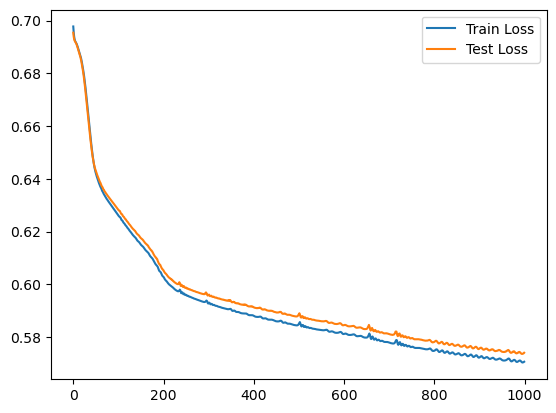

F1:0.7348782488558848
Accuracy:0.720875
Confusion Matrix:
[[58789 23755]
 [25371 68085]]


In [5]:
# Create the model
hidden_size = 50
model = mlp.MLP_mach1(28, hidden_size)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .002
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)


Epoch 1/1000, Train Loss: 0.6954293251037598, Test Loss: 0.6947627663612366
Epoch 2/1000, Train Loss: 0.694612979888916, Test Loss: 0.693995475769043
Epoch 3/1000, Train Loss: 0.6938775777816772, Test Loss: 0.6933078169822693
Epoch 4/1000, Train Loss: 0.6932206749916077, Test Loss: 0.6926975846290588
Epoch 5/1000, Train Loss: 0.6926417946815491, Test Loss: 0.6921645998954773
Epoch 6/1000, Train Loss: 0.6921415328979492, Test Loss: 0.6917067766189575
Epoch 7/1000, Train Loss: 0.6917163133621216, Test Loss: 0.6913198828697205
Epoch 8/1000, Train Loss: 0.691359281539917, Test Loss: 0.6909976005554199
Epoch 9/1000, Train Loss: 0.6910645961761475, Test Loss: 0.6907327175140381
Epoch 10/1000, Train Loss: 0.6908247470855713, Test Loss: 0.690515398979187
Epoch 11/1000, Train Loss: 0.6906303763389587, Test Loss: 0.6903337836265564
Epoch 12/1000, Train Loss: 0.6904714107513428, Test Loss: 0.6901779174804688
Epoch 13/1000, Train Loss: 0.6903373003005981, Test Loss: 0.6900385022163391
Epoch 14/100

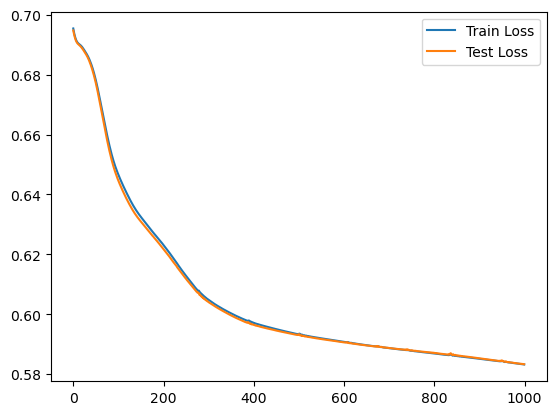

F1:0.7286191005879548
Accuracy:0.7088977272727273
Confusion Matrix:
[[55988 26705]
 [24529 68778]]


In [11]:
# Lets do the same thing as above, but try adding momentum to the optimizer
model2_1 = mlp.MLP_mach1(28, hidden_size)
# set a new optimizer, SGD with momentum
optimizer2_1 = torch.optim.SGD(model2_1.parameters(), lr=lr, momentum=0.9)
# Train the model using our function
train_losses2_1, test_losses2_1 = mlp.train_model(model2_1, X_train, y_train, X_test, y_test, criterion, optimizer2_1, n_epochs)    
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses2_1, test_losses2_1, model2_1, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)


Epoch 1/1000, Train Loss: 0.7127986550331116, Test Loss: 0.7098575234413147
Epoch 2/1000, Train Loss: 0.710421621799469, Test Loss: 0.7078051567077637
Epoch 3/1000, Train Loss: 0.7083495855331421, Test Loss: 0.7060075402259827
Epoch 4/1000, Train Loss: 0.70658940076828, Test Loss: 0.7044147253036499
Epoch 5/1000, Train Loss: 0.7050204873085022, Test Loss: 0.7030087113380432
Epoch 6/1000, Train Loss: 0.703717052936554, Test Loss: 0.701776385307312
Epoch 7/1000, Train Loss: 0.7025783061981201, Test Loss: 0.7006523609161377
Epoch 8/1000, Train Loss: 0.7015446424484253, Test Loss: 0.6995749473571777
Epoch 9/1000, Train Loss: 0.7005327343940735, Test Loss: 0.6985135674476624
Epoch 10/1000, Train Loss: 0.6996951699256897, Test Loss: 0.6974667310714722
Epoch 11/1000, Train Loss: 0.6988312602043152, Test Loss: 0.6964492797851562
Epoch 12/1000, Train Loss: 0.6982004046440125, Test Loss: 0.6954841613769531
Epoch 13/1000, Train Loss: 0.697506844997406, Test Loss: 0.6945942640304565
Epoch 14/1000,

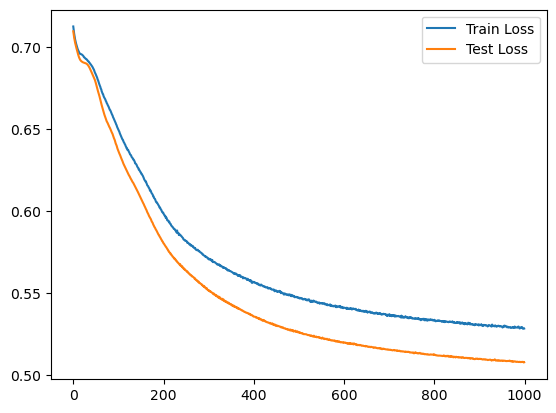

F1:0.760409849257014
Accuracy:0.7462386363636364
Confusion Matrix:
[[60464 22229]
 [22433 70874]]


In [6]:
# Now lets see how our mach2 model does
# Set the size for four hidden layers and the dropout rate
model2 = mlp.MLP_mach2(28, 90, 60, 30, 10, 0.2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
optimizer = torch.optim.Adam(model2.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model2, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model2, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

In [10]:
model3 = mlp.MLP_mach3(28, 250, 200, 150, 100, 50, 10, 0.2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
optimizer = torch.optim.Adam(model3.parameters(), lr=lr)
n_epochs = 100
# Train the model using our function
train_losses, test_losses = mlp.train_model(model3, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
f1, acc, cm = mlp.getResults(train_losses, test_losses, model3, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Epoch 1/100, Train Loss: 0.692429780960083, Test Loss: 0.6921226382255554
Epoch 2/100, Train Loss: 0.692003071308136, Test Loss: 0.6918318271636963
Epoch 3/100, Train Loss: 0.6916661262512207, Test Loss: 0.6915619969367981
Epoch 4/100, Train Loss: 0.691385805606842, Test Loss: 0.6913436651229858
Epoch 5/100, Train Loss: 0.691175639629364, Test Loss: 0.6910753846168518
Epoch 6/100, Train Loss: 0.6908677816390991, Test Loss: 0.6904028058052063
Epoch 7/100, Train Loss: 0.6903401017189026, Test Loss: 0.6894748210906982
Epoch 8/100, Train Loss: 0.6895642280578613, Test Loss: 0.6885915994644165
Epoch 9/100, Train Loss: 0.6888293623924255, Test Loss: 0.6871492266654968
Epoch 10/100, Train Loss: 0.6875709295272827, Test Loss: 0.6849786043167114
Epoch 11/100, Train Loss: 0.6858924627304077, Test Loss: 0.6827300190925598
Epoch 12/100, Train Loss: 0.684144139289856, Test Loss: 0.6800819039344788
Epoch 13/100, Train Loss: 0.6816034913063049, Test Loss: 0.6781975030899048
Epoch 14/100, Train Loss: 

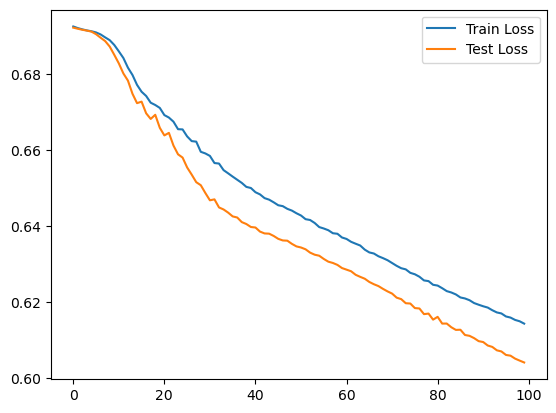